In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('../Matrix-Chain-4/variants-linnea/log.txt',  sep=';')

In [15]:
df

,case:concept:name,concept:name,time:start,time:end
0,V0,"gemm!('N', 'N', 1.0, ml2, ml3, 0.0, ml4)",1.652890e+09,1.652890e+09
1,V0,"gemm!('N', 'N', 1.0, ml1, ml4, 0.0, ml5)",1.652890e+09,1.652890e+09
2,V0,"gemm!('N', 'N', 1.0, ml0, ml5, 0.0, ml6)",1.652890e+09,1.652890e+09
3,V1,"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml4)",1.652890e+09,1.652890e+09
4,V1,"gemm!('N', 'N', 1.0, ml2, ml3, 0.0, ml5)",1.652890e+09,1.652890e+09
5,V1,"gemm!('N', 'N', 1.0, ml4, ml5, 0.0, ml6)",1.652890e+09,1.652890e+09
6,V2,"gemm!('N', 'N', 1.0, ml1, ml2, 0.0, ml4)",1.652890e+09,1.652890e+09
7,V2,"gemm!('N', 'N', 1.0, ml0, ml4, 0.0, ml5)",1.652890e+09,1.652890e+09
8,V2,"gemm!('N', 'N', 1.0, ml5, ml3, 0.0, ml6)",1.652890e+09,1.652890e+09
9,V3,"gemm!('N', 'N', 1.0, ml2, ml3, 0.0, ml4)",1.652890e+09,1.652890e+09


### Convert. CSV to XES

In [20]:
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter

In [21]:
log_csv = dataframe_utils.convert_timestamp_columns_in_df(df)
log_csv = log_csv.sort_values('time:end')
event_log = log_converter.apply(log_csv)

In [27]:
pd.DataFrame(event_log[0])

,concept:name,time:end,time:start
0,"gemm!('N', 'N', 1.0, ml2, ml3, 0.0, ml4)",1.652890e+09,1.652890e+09
1,"gemm!('N', 'N', 1.0, ml1, ml4, 0.0, ml5)",1.652890e+09,1.652890e+09
2,"gemm!('N', 'N', 1.0, ml0, ml5, 0.0, ml6)",1.652890e+09,1.652890e+09


In [28]:
event_log[0].attributes

{'concept:name': 'V0'}

### Process discovery

In [29]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

In [30]:
net, initial_marking, final_marking = inductive_miner.apply(event_log)

In [37]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking)

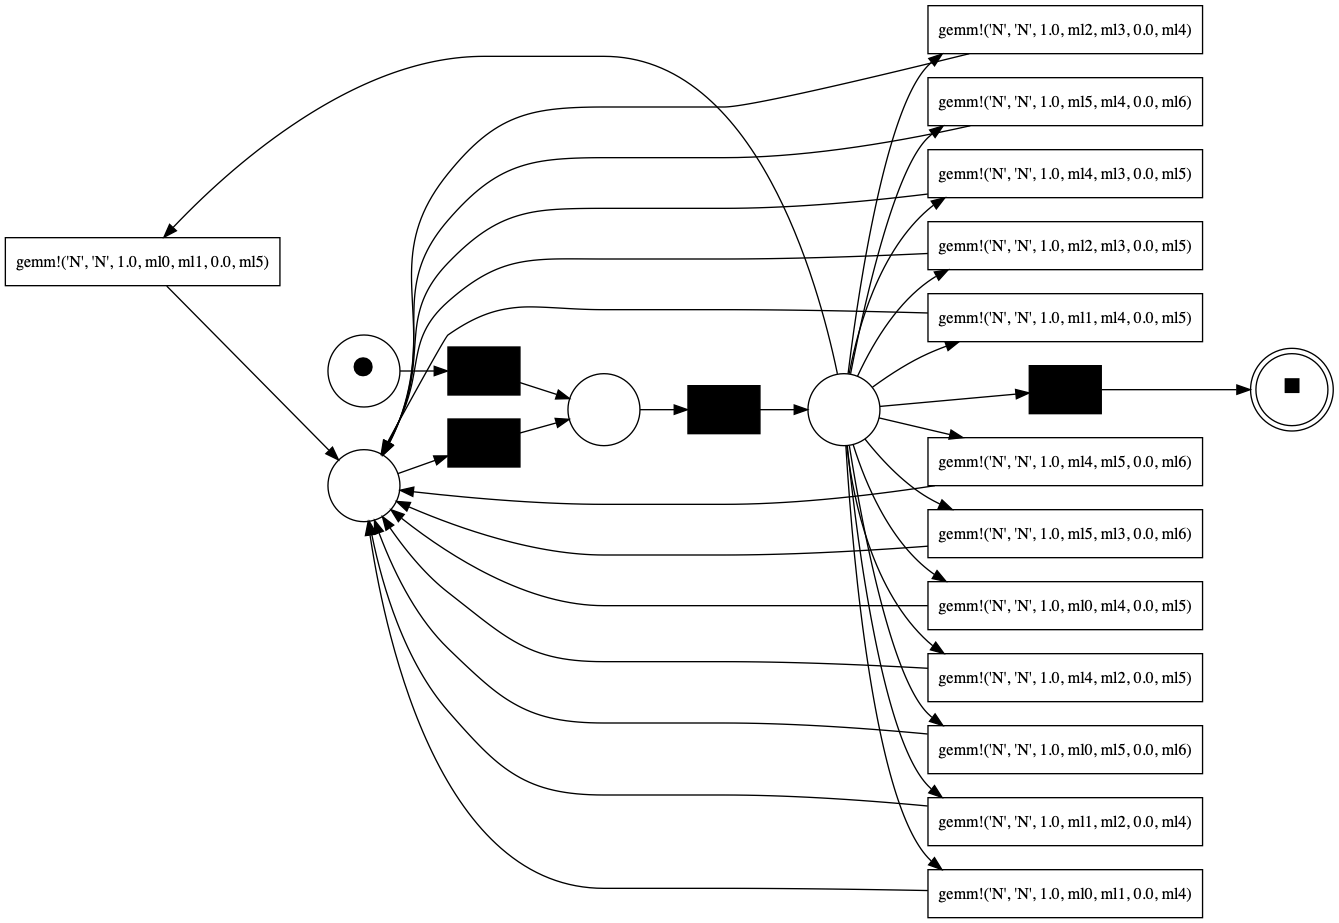

In [38]:
pn_visualizer.view(gviz)